In [18]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [15]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [30]:
total_value = df.count()['Total Score']

In [24]:
df1 = df[df['Total Score'] >= 240]
df1.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
6,female,group B,some college,standard,completed,88,95,92,275
16,male,group C,high school,standard,none,88,89,86,263
34,male,group E,some college,standard,none,97,87,82,266


In [25]:
df1.to_csv('HSG.csv', index=False)

###  Nam hay Nữ đạt điểm giỏi ở 3 phần thi cao hơn?

In [26]:
df.groupby('gender').count()['Total Score']

gender
female    518
male      482
Name: Total Score, dtype: int64

###  Thống kê số lượng học sinh đạt điểm giỏi ở mỗi chủng tộc theo D1

In [32]:
df.groupby('race/ethnicity').count()['Total Score']

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: Total Score, dtype: int64

### Từ df hãy cho biết có bao nhiêu học sinh đạt yêu cầu bài thi

In [28]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [33]:
df[df['Total Score'] >=200].count()['Total Score']

556

### Từ df hãy cho biết % số học sinh chỉ đạt điểm giỏi ở đúng một phần thi

- Số học sinh chỉ đạt điểm giỏi môn Toán:

In [ ]:
good_math = df[df['math score'] >=80].count()['math score']

=> Phần trăm số học sinh chỉ đạt điểm giỏi môn Toán:

In [ ]:
percent_good_math = (good_math/total_value)*100
print(percent_good_math)

19.3


- Số học sinh chỉ đạt điểm giỏi Reading

In [ ]:
good_reading = df[df['reading score'] >=80].count()['reading score']

=> Phần trăm số học sinh chỉ đạt điểm giỏi Reading

In [ ]:
percent_good_reading = (good_reading/total_value)*100
print(percent_good_reading)

24.9


- Số học sinh chỉ đạt điểm giỏi Writing

In [ ]:
good_writing = df[df['writing score'] >=80].count()['writing score']

=> Phần trăm số học sinh chỉ đạt điểm giỏi Wrinting

In [ ]:
percent_good_writing = (good_writing/total_value)*100
print(percent_good_writing)

23.5


### Từ df hãy chỉ ra trường/cột nào có ảnh hưởng lớn nhất đến việc học sinh đạt yêu cầu bài thi

In [34]:
df2 = df[df['Total Score'] >=200]
df3 = df[df['Total Score'] <200]
df2.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278


In [ ]:
gender = set(df['gender'])
value_gender = df2.groupby('gender').count()['Total Score']

gender2 = set(df['gender'])
value_gender2 = df3.groupby('gender').count()['Total Score']

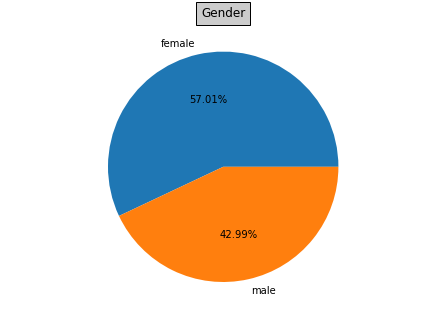

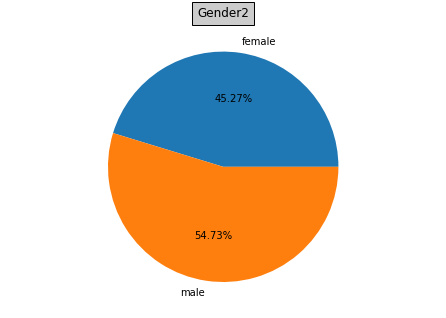

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_gender, labels = gender,autopct='%1.2f%%')
plt.title("Gender", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_gender2, labels = gender2,autopct='%1.2f%%')
plt.title("Gender2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
race = set(df['race/ethnicity'])
value_race = df2.groupby('race/ethnicity').count()['Total Score']

race2 = set(df['race/ethnicity'])
value_race2 = df3.groupby('race/ethnicity').count()['Total Score']

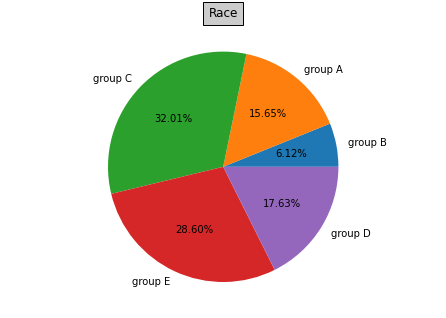

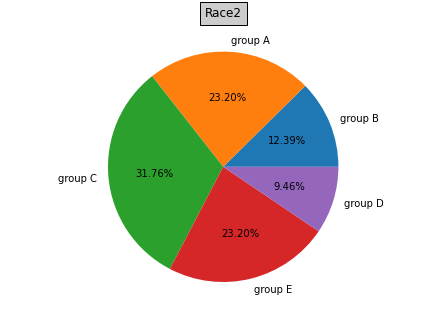

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_race, labels = race,autopct='%1.2f%%')
plt.title("Race", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_race2, labels = race2,autopct='%1.2f%%')
plt.title("Race2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [39]:
parental_level_of_education = set(df['parental level of education'])
value_parental_level_of_education = df2.groupby('parental level of education').count()['Total Score']

parental_level_of_education2 = set(df['parental level of education'])
value_parental_level_of_education2 = df3.groupby('parental level of education').count()['Total Score']

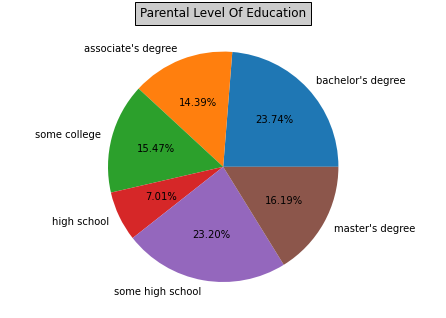

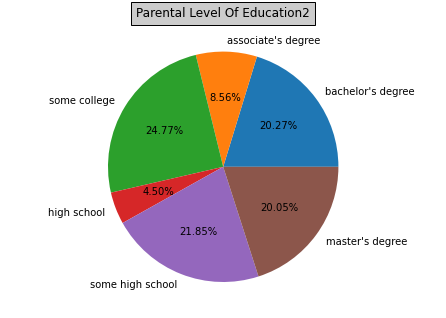

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_parental_level_of_education, labels = parental_level_of_education,autopct='%1.2f%%')
plt.title("Parental Level Of Education", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_parental_level_of_education2, labels = parental_level_of_education2,autopct='%1.2f%%')
plt.title("Parental Level Of Education2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
lunch = set(df['lunch'])
value_lunch = df2.groupby('lunch').count()['Total Score']

lunch2 = set(df['lunch'])
value_lunch2 = df3.groupby('lunch').count()['Total Score']

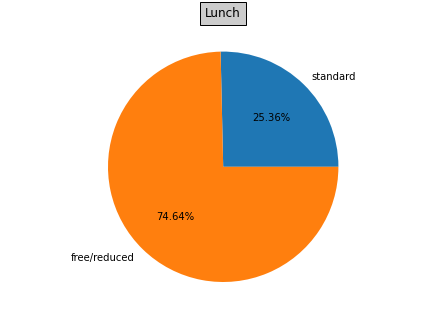

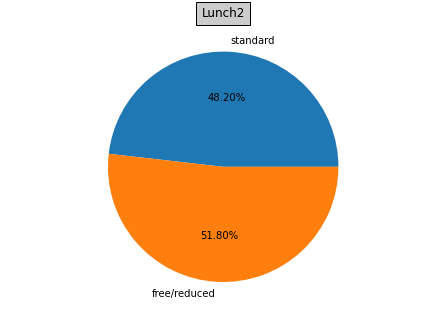

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_lunch, labels = lunch,autopct='%1.2f%%')
plt.title("Lunch", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_lunch2, labels = lunch2,autopct='%1.2f%%')
plt.title("Lunch2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [35]:
test_preparation_course = set(df['test preparation course'])
value_test_preparation_course = df2.groupby('test preparation course').count()['Total Score']

test_preparation_course2 = set(df['test preparation course'])
value_test_preparation_course2 = df3.groupby('test preparation course').count()['Total Score']

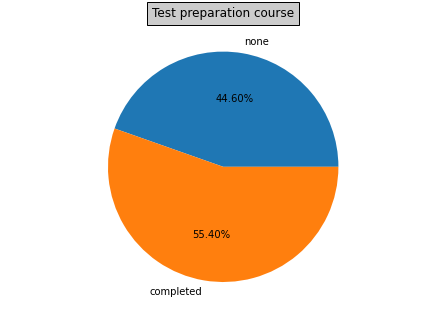

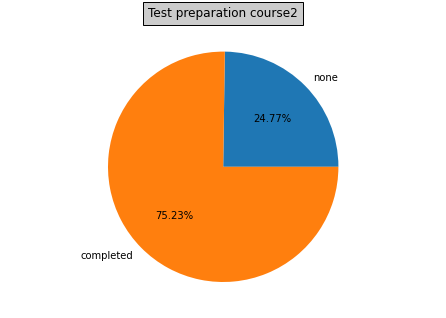

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_test_preparation_course, labels = test_preparation_course,autopct='%1.2f%%')
plt.title("Test preparation course", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,2,1,1])
fig.set_facecolor('white')
ax.axis('equal')
ax.pie(value_test_preparation_course2, labels = test_preparation_course2,autopct='%1.2f%%')
plt.title("Test preparation course2", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Kết luận của em là Lunch